In [1]:
! pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree,
export_text)
from sklearn.metrics import (accuracy_score,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

# 8.5 Applied Exercises

## Question 7. In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [9]:
Boston = load_data('Boston')
X = Boston.columns.drop('medv')
predictors = X.shape[0]
y = 'medv'
X_train, X_test, y_train, y_test = skm.train_test_split(Boston[X], Boston[y], test_size =0.25, random_state = 0)

In [7]:
def getYvalue(max_features, n_estimators):
  y_val = np.array([])
  for i in range(1, n_estimators + 1, 10):
    print(i)
    boston_rf = RF(max_features = max_features, n_estimators = i , random_state = 0).fit(X_train, y_train)
    y_hat_rf = boston_rf.predict(X_test)
    y_val = np.append(y_val, np.mean((y_test - y_hat_rf)** 2))
  return y_val

In [22]:
y1 = getYvalue(predictors, 500)
y2 = getYvalue(int(np.sqrt(predictors)), 500)
y3 = getYvalue(int(np.log(predictors)), 500)
y4 = getYvalue(predictors//2, 500)


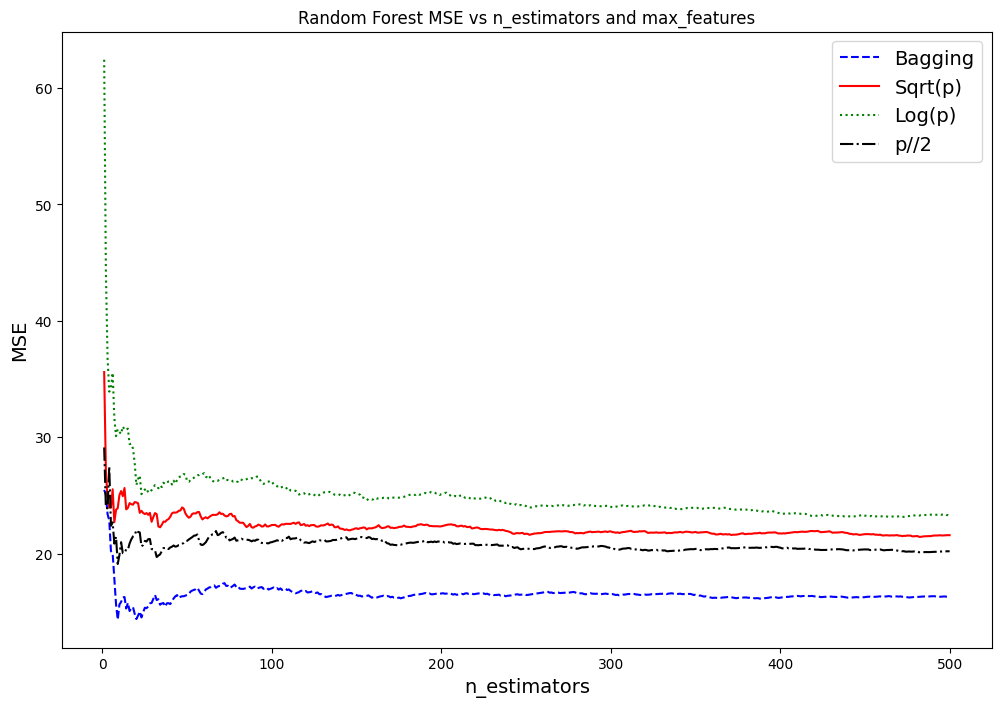

In [25]:

plt.figure(figsize = (12,8))
plt.plot(np.arange(1, 501), y1, label = 'Bagging', color = 'blue', linestyle = '--')
plt.plot(np.arange(1, 501), y2, label = 'Sqrt(p)', color = 'red', linestyle = '-')
plt.plot(np.arange(1, 501), y3, label = 'Log(p)', color = 'green', linestyle = ':')
plt.plot(np.arange(1, 501), y4, label = 'p//2', color = 'black', linestyle = '-.')
plt.legend(fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.ylabel('MSE', fontsize =14)
plt.title('Random Forest MSE vs n_estimators and max_features')
plt.show();

In [21]:
y1.shape

(500,)

## Question - 8. In the lab, a classifcation tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

### (a) Split the data set into a training set and a test set

In [26]:
Carseats = load_data('Carseats')

In [30]:
Carseats['US'] = np.where(Carseats['US'] == 'Yes', 1, 0)
Carseats['Urban'] = np.where(Carseats['Urban'] == 'Yes', 1, 0)
Carseats['ShelveLoc'] = Carseats['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

In [31]:
X = Carseats.columns.drop('Sales')
y = 'Sales'
X_len = X.shape[0]
X_list = list(X)
X_train, X_test, y_train, y_test = skm.train_test_split(Carseats[X], Carseats[y], test_size = 0.25, random_state =0)

### (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [32]:
carseat_rt = DTR(random_state = 0).fit(X_train, y_train)
mse = np.mean((y_test - carseat_rt.predict(X_test))** 2)
mse

5.388343

[Text(0.5990968932215743, 0.96875, 'ShelveLoc <= 1.5\nsquared_error = 8.133\nsamples = 300\nvalue = 7.395'),
 Text(0.3228749088921283, 0.90625, 'Price <= 106.5\nsquared_error = 6.052\nsamples = 239\nvalue = 6.709'),
 Text(0.15096574344023322, 0.84375, 'Age <= 60.5\nsquared_error = 5.232\nsamples = 84\nvalue = 8.045'),
 Text(0.0723396501457726, 0.78125, 'ShelveLoc <= 0.5\nsquared_error = 4.569\nsamples = 48\nvalue = 9.011'),
 Text(0.03279883381924198, 0.71875, 'Price <= 93.0\nsquared_error = 4.413\nsamples = 14\nvalue = 7.336'),
 Text(0.016034985422740525, 0.65625, 'Education <= 10.5\nsquared_error = 2.078\nsamples = 9\nvalue = 8.43'),
 Text(0.013119533527696793, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 11.67'),
 Text(0.018950437317784258, 0.59375, 'Population <= 247.0\nsquared_error = 0.862\nsamples = 8\nvalue = 8.025'),
 Text(0.011661807580174927, 0.53125, 'Age <= 49.5\nsquared_error = 0.457\nsamples = 4\nvalue = 7.352'),
 Text(0.008746355685131196, 0.46875, 'Price <= 90.0\

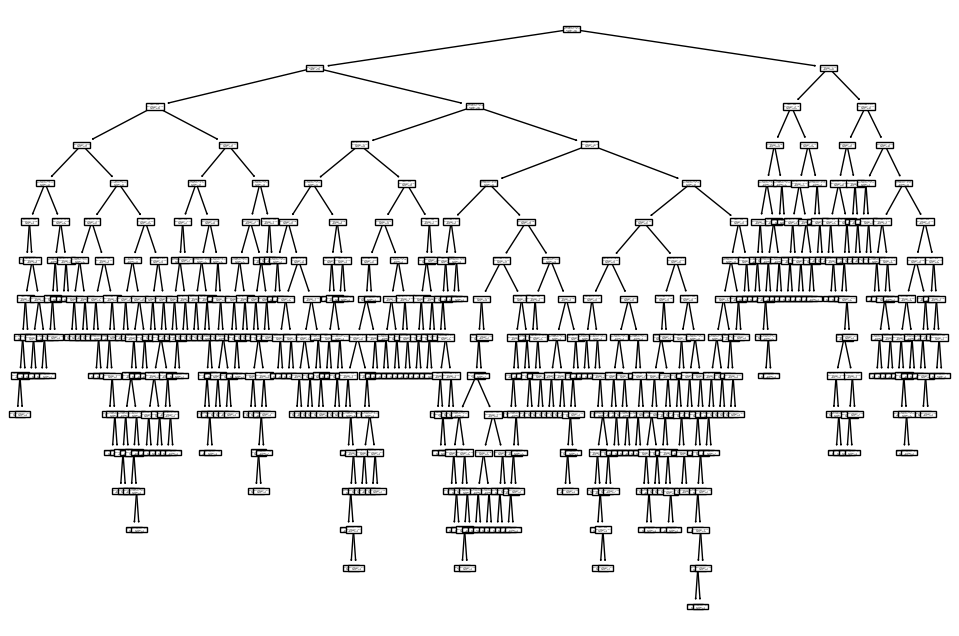

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(carseat_rt, feature_names = X_list, ax = ax)

In [34]:
#Huge Tree since we didn't specifiy the max depth

### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [61]:
def regressionTreeCV(X_train, X_test, y_train, y_test, max_depth, folds, goal):
  carseat_rt = DTR(max_depth = max_depth, random_state = 0)
  carseat_rt.fit(X_train, y_train)
  ccp_path = carseat_rt.cost_complexity_pruning_path(X_train, y_train)
  kfold = skm.KFold(folds, random_state = 0, shuffle = True)
  term = {'ccp_alpha': ccp_path.ccp_alphas}
  grid = skm.GridSearchCV(carseat_rt, term, cv = kfold, refit = True, scoring = goal)
  grid.fit(X_train, y_train)
  mse_cv_ = np.mean((y_test - grid.predict(X_test))** 2)
  return mse_cv_, grid, ccp_path

In [62]:
def plotregressionTreeCV(X_train, X_test, y_train, y_test, ccp_path):
  mse_cv = np.array([])
  for alpha in ccp_path.ccp_alphas:
    carseat_rt_ = DTR(random_state = 0, ccp_alpha = alpha).fit(X_train, y_train)
    mse_cv = np.append(mse_cv, np.mean((y_test - carseat_rt_.predict(X_test))** 2))

  plt.figure(figsize = (12,8))
  plt.plot(ccp_path.ccp_alphas, mse_cv)
  plt.xlabel('alpha')
  plt.ylabel('MSE')
  plt.axhline(y = np.min(mse_cv), color = 'red', linestyle = '--')
  plt.show();

In [63]:
mse_cv_, grid, ccp_path = regressionTreeCV(X_train, X_test, y_train, y_test, 100, 10, 'neg_mean_squared_error')

In [64]:
# Yes our MSE improved by over 1.25 points
mse_cv_, grid.best_params_


(4.134253380788491, {'ccp_alpha': 0.34840829398147233})

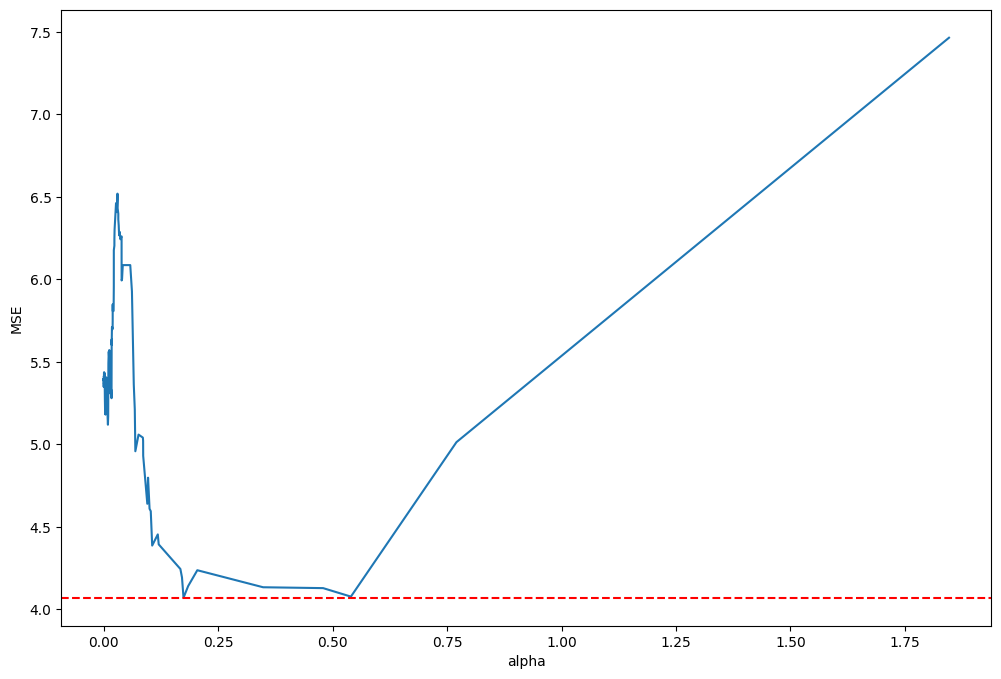

In [65]:
plotregressionTreeCV(X_train, X_test, y_train, y_test,ccp_path )

### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [71]:
def bagging(X_train, X_test, y_train, y_test):
  carseat_bag = RF(n_estimators = 250, max_features = X_test.shape[1], random_state = 0).fit(X_train, y_train)
  mse_bag = np.mean((y_test - carseat_bag.predict(X_test))**2)
  return mse_bag, carseat_bag

In [72]:
mse_bag, carseat_bag = bagging(X_train, X_test, y_train, y_test)
mse_bag

(2.223778823568,
 array([0.09838016, 0.05391249, 0.0664195 , 0.03949498, 0.28451782,
        0.30502846, 0.10800254, 0.03248894, 0.00498213, 0.00677298]))

In [73]:
feature_importance = pd.Series(carseat_bag.feature_importances_, index = X_list).sort_values(ascending = False)
feature_importance

ShelveLoc      0.305028
Price          0.284518
Age            0.108003
CompPrice      0.098380
Advertising    0.066420
Income         0.053912
Population     0.039495
Education      0.032489
US             0.006773
Urban          0.004982
dtype: float64

In [74]:
# The most importance features are shelveLoc, Price, and Age

### (e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [77]:
def randomForest(X_train, X_test, y_train, y_test):
  mse_rf_ = np.array([])
  for i in range(1, X_train.shape[1] + 1):
    carseat_rf = RF(n_estimators = 250, random_state = 0, max_features = i).fit(X_train, y_train)
    mse_rf = np.mean((y_test - carseat_rf.predict(X_test))**2)
    mse_rf_ = np.append(mse_rf_, mse_rf)
  return mse_rf_

In [78]:
mse_rf_ = randomForest(X_train , X_test, y_train, y_test)

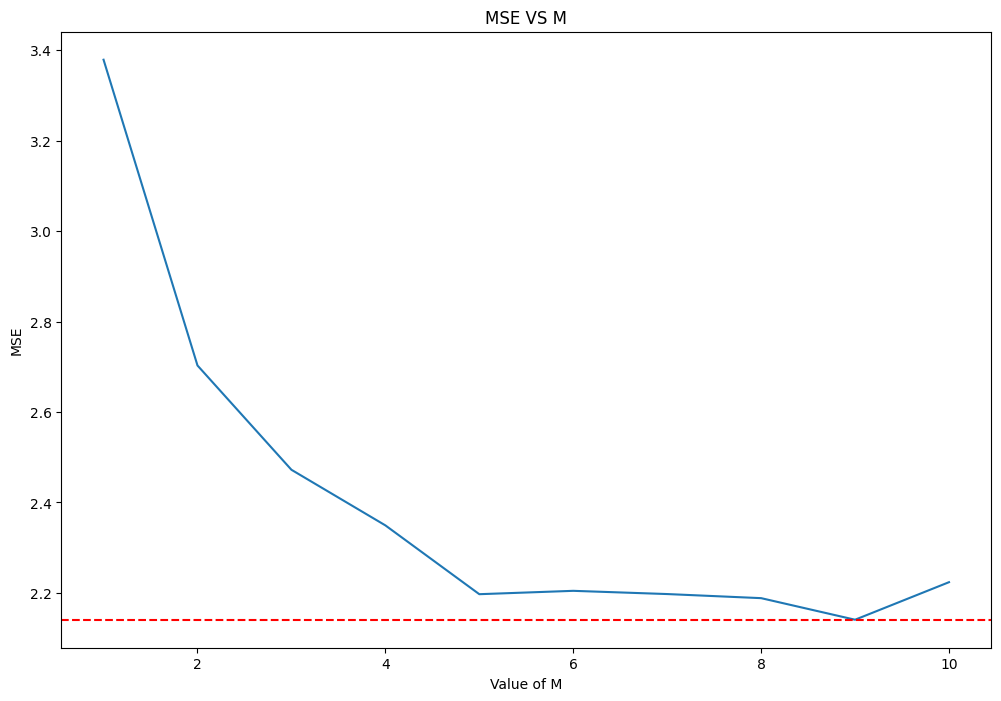

In [84]:
pd.Series(mse_rf_, index = np.arange(1, X_train.shape[1] + 1)).plot(figsize = (12,8))
plt.xlabel('Value of M')
plt.ylabel('MSE')
plt.title('MSE VS M')
plt.axhline(y = np.min(mse_rf_), color = 'red', linestyle = '--')
plt.show();

In [85]:
carseats_rf = RF(n_estimators = 250, max_features = np.argmin(mse_rf_) + 1, random_state = 0).fit(X_train, y_train)
feature_imp_ = pd.Series(carseats_rf.feature_importances_, index = X_list).sort_values(ascending = False)
feature_imp_

ShelveLoc      0.301691
Price          0.281479
Age            0.107380
CompPrice      0.097370
Advertising    0.068247
Income         0.056531
Population     0.042951
Education      0.032512
US             0.007389
Urban          0.004451
dtype: float64

In [86]:
# Looks like the same features are important of ShelveLoc, Price, and Age
print(min(mse_rf_))
# Our MSE did go down barley


2.1407846927519993


### (f) Now analyze the data using BART, and report your results.

In [87]:
carseats_bart = BART(random_state = 0, burnin = 50, ndraw = 200).fit(X_train, y_train)
mse_bart = np.mean((y_test - carseats_bart.predict(X_test))**2)
mse_bart

1.5231467800028722

In [88]:
# Bart performs the best so far then Random Forest, Bagging, and Regression Tree which we assumed from the lab and notes.

In [113]:
#Lets quickly check how boosting would have performed here
carseats_boost = GBR(random_state = 0, learning_rate = .2, n_estimators = 250).fit(X_train, y_train)
mse_boost = np.mean((y_test - carseats_boost.predict(X_test))**2)
mse_boost

1.9766964888421663

In [114]:
# As expected it performed better than random forest and bagging. We believed this since it learns successively and uses the orginial data rather than bootstraping it.
# We also expect BART to perform better than boosting since it is built on top of boosting with the addition of perturbing the trees

## Question 9. This problem involves the OJ data set which is part of the ISLP package.

### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [14]:
OJ = load_data('OJ')


In [15]:
OJ.shape

(1070, 18)

In [16]:
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [17]:
OJ.info(), OJ['Purchase'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Purchase        1070 non-null   category
 1   WeekofPurchase  1070 non-null   int64   
 2   StoreID         1070 non-null   int64   
 3   PriceCH         1070 non-null   float64 
 4   PriceMM         1070 non-null   float64 
 5   DiscCH          1070 non-null   float64 
 6   DiscMM          1070 non-null   float64 
 7   SpecialCH       1070 non-null   int64   
 8   SpecialMM       1070 non-null   int64   
 9   LoyalCH         1070 non-null   float64 
 10  SalePriceMM     1070 non-null   float64 
 11  SalePriceCH     1070 non-null   float64 
 12  PriceDiff       1070 non-null   float64 
 13  Store7          1070 non-null   category
 14  PctDiscMM       1070 non-null   float64 
 15  PctDiscCH       1070 non-null   float64 
 16  ListPriceDiff   1070 non-null   float64 
 17  STORE         

(None,
 Purchase
 CH    653
 MM    417
 Name: count, dtype: int64)

In [18]:
OJ['Purchase'] = OJ['Purchase'].map({'CH': 1, 'MM': 0})
OJ['Store7'] = OJ['Store7'].map({'Yes': 1, 'No': 0})

In [19]:
X_train, X_test, y_train, y_test = skm.train_test_split(OJ.drop('Purchase', axis = 1), OJ['Purchase'], train_size = 0.2523, random_state = 0 )

In [20]:
features = OJ.columns.drop('Purchase')
features_list = list(features)
response = 'Purchase'

In [21]:
OJ['Purchase'], OJ['Store7']

(0       1
 1       1
 2       1
 3       0
 4       1
        ..
 1065    1
 1066    1
 1067    0
 1068    1
 1069    1
 Name: Purchase, Length: 1070, dtype: category
 Categories (2, int64): [1, 0],
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 1065    1
 1066    1
 1067    1
 1068    1
 1069    0
 Name: Store7, Length: 1070, dtype: category
 Categories (2, int64): [0, 1])

### (b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?

In [23]:
purchase_tree = DTC(random_state = 0).fit(X_train, y_train)
classification_error = 1 - purchase_tree.score(X_test, y_test)
classification_error

0.233458177278402

In [24]:
classification_error_train = 1 - purchase_tree.score(X_train ,y_train)
classification_error_train

0.0037174721189591198

In [25]:
#Extremely low training error so an overfit, relatively normal test error

### (c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?



[Text(0.5651408450704225, 0.9736842105263158, 'LoyalCH <= 0.598\ngini = 0.476\nsamples = 269\nvalue = [105, 164]'),
 Text(0.36690140845070424, 0.9210526315789473, 'PriceDiff <= 0.31\ngini = 0.456\nsamples = 139\nvalue = [90, 49]'),
 Text(0.2295774647887324, 0.868421052631579, 'LoyalCH <= 0.035\ngini = 0.393\nsamples = 108\nvalue = [79, 29]'),
 Text(0.20704225352112676, 0.8157894736842105, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.252112676056338, 0.8157894736842105, 'PctDiscMM <= 0.227\ngini = 0.444\nsamples = 87\nvalue = [58, 29]'),
 Text(0.2295774647887324, 0.7631578947368421, 'PriceMM <= 1.74\ngini = 0.474\nsamples = 75\nvalue = [46, 29]'),
 Text(0.09014084507042254, 0.7105263157894737, 'StoreID <= 4.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.0676056338028169, 0.6578947368421053, 'WeekofPurchase <= 228.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.04507042253521127, 0.6052631578947368, 'StoreID <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'

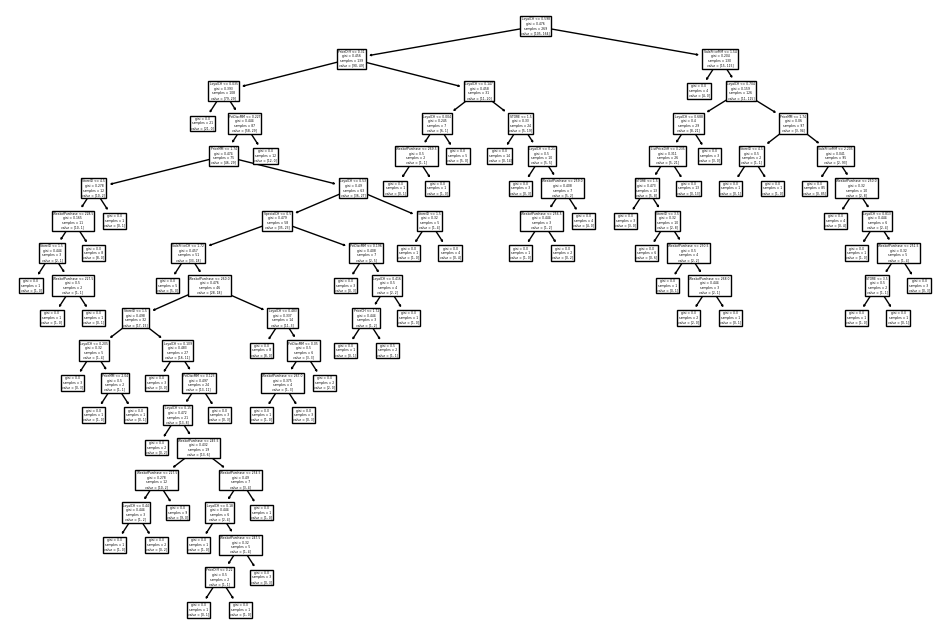

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(purchase_tree, ax = ax, feature_names = features_list)

In [27]:
# 50 ish terminal nodes +- 5ish

### (d) Use the export_tree() function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.

In [30]:
print(export_text(purchase_tree, feature_names = features_list))

|--- LoyalCH <= 0.60
|   |--- PriceDiff <= 0.31
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- class: 0
|   |   |--- LoyalCH >  0.04
|   |   |   |--- PctDiscMM <= 0.23
|   |   |   |   |--- PriceMM <= 1.74
|   |   |   |   |   |--- StoreID <= 4.50
|   |   |   |   |   |   |--- WeekofPurchase <= 228.50
|   |   |   |   |   |   |   |--- StoreID <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- StoreID >  1.50
|   |   |   |   |   |   |   |   |--- WeekofPurchase <= 227.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- WeekofPurchase >  227.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- WeekofPurchase >  228.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- StoreID >  4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- PriceMM >  1.74
|   |   |   |   |   |--- LoyalCH <= 0.53
|   |   |   |   |   |   |--- SpecialCH <= 0.50
|   |   |   |   |   |   |   |--- 

In [31]:
#Here is a terminal node of WeekofPurchase
# We know it is a terminal node since there isn't any nodes below it or indented right below it
# To interept it is if you are greater than 251.50 on your WeekofPurchase then you go here!

### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [35]:
confusion = confusion_table(purchase_tree.predict(X_test), y_test)
print(1 - accuracy_score(purchase_tree.predict(X_test), y_test))
confusion

0.233458177278402


Truth,0,1
Predicted,,
0,225,100
1,87,389


In [36]:
# The error rate is the same as it was above by using 1 - purchase_tree.score(X_test)

### (f) Use cross-validation on the training set in order to determine the optimal tree size.

In [37]:
ccp_path = purchase_tree.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(random_state = 0, shuffle = True, n_splits = 10)

In [89]:
grid = skm.GridSearchCV(purchase_tree, {'ccp_alpha': ccp_path.ccp_alphas}, cv = kfold, scoring = 'accuracy')
grid.fit(X_train, y_train)
alpha = grid.best_params_['ccp_alpha']

In [90]:
alpha

0.007966011683483803

In [42]:
grid.best_score_

0.7809116809116808

In [51]:
best_ = grid.best_estimator_
best_.tree_.n_leaves, best_.tree_.node_count, best_.tree_.max_depth


(12, 23, 6)

In [49]:
# Best tree has an alpha of .007967, 12 terminal nodes, and 23 total nodes

### (g) Produce a plot with tree size on the x-axis and cross-validated classifcation error rate on the y-axis.

In [92]:
cv_scores =np.array([])
for i in range(2,18):
  dtc = DTC(random_state = 0, max_leaf_nodes = i, ccp_alpha = alpha).fit(X_train, y_train)
  cv_scores = np.append(cv_scores, 1 - np.mean(skm.cross_val_score(dtc, X_test, y_test, cv = 10)))





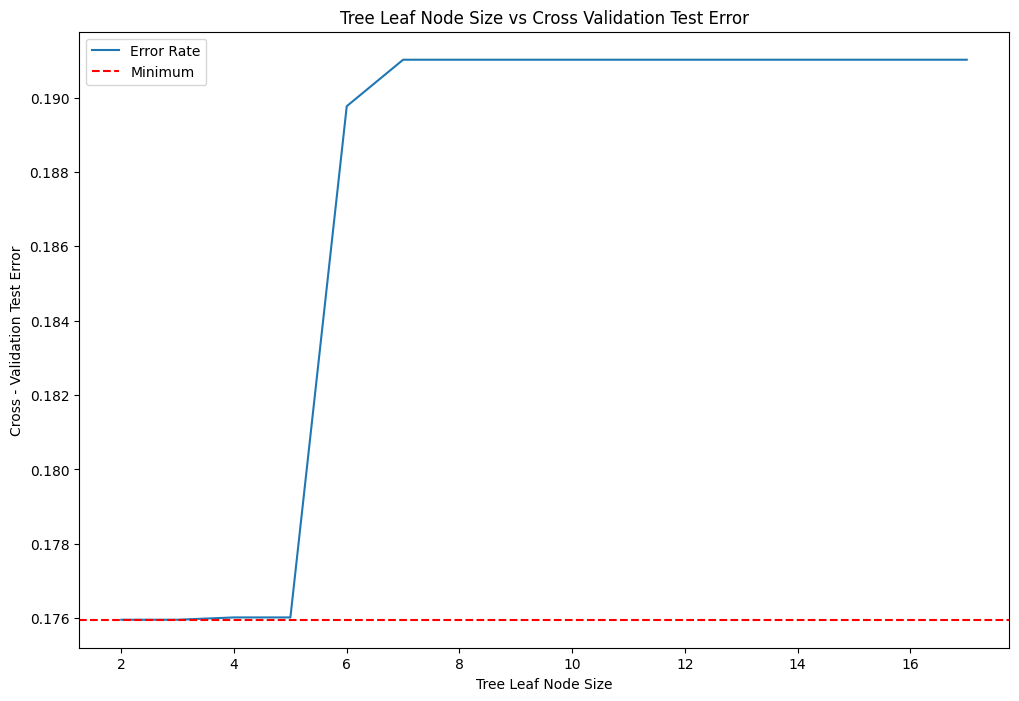

In [93]:
plt.figure(figsize = (12,8))
plt.plot(range(2,18), cv_scores, label = 'Error Rate')
plt.xlabel('Tree Leaf Node Size')
plt.ylabel('Cross - Validation Test Error')
plt.title('Tree Leaf Node Size vs Cross Validation Test Error')
plt.axhline(y = np.min(cv_scores), linestyle = '--', color = 'red', label = 'Minimum')
plt.legend()
plt.show();

### (h) Which tree size corresponds to the lowest cross-validated classifcation error rate?

In [94]:
print(np.argmin(cv_scores) + 2)

2


In [95]:
# The tree with 2 leaves so the depth is 1. Almost a stump lol

### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

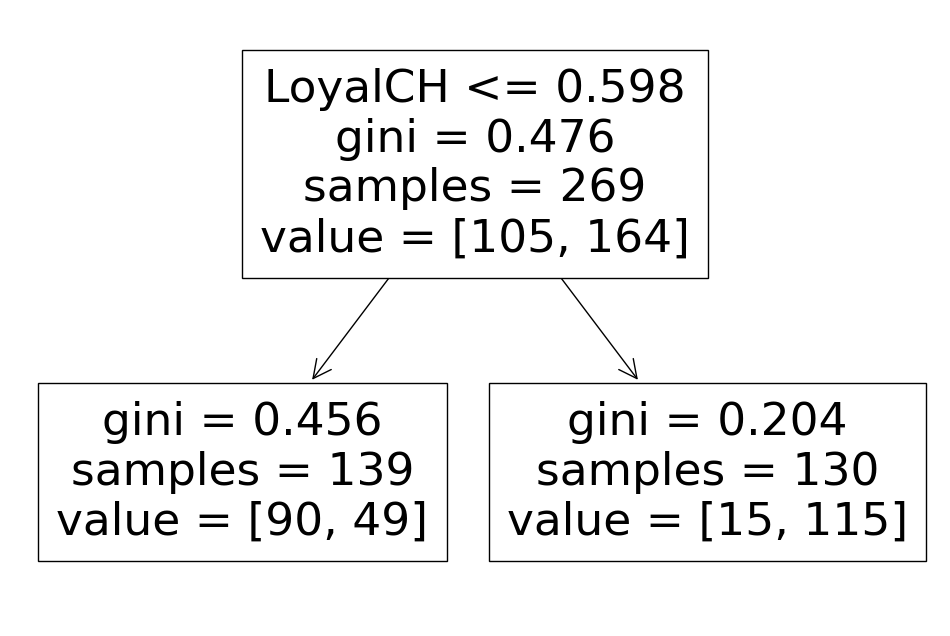

In [96]:
dtc = DTC(max_leaf_nodes = 2, random_state = 0).fit(X_train, y_train)
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(dtc, ax =ax, feature_names = features_list);

In [97]:
# Hmm very simple and easy to read

In [98]:
1 - dtc.score(X_test, y_test)

0.2272159800249688

In [99]:
1 - grid.score(X_test, y_test)

0.20973782771535576

In [100]:
# We see its relatively similar to the best alpha and letting the tree be any size it wanted to

### (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [101]:
1 - purchase_tree.score(X_train, y_train), 1 - dtc.score(X_train, y_train)

(0.0037174721189591198, 0.2379182156133829)

In [102]:
# We can see the unpruned tree performed much better on the training data

### (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [103]:
1 - purchase_tree.score(X_test, y_test), 1 - dtc.score(X_test, y_test)

(0.233458177278402, 0.2272159800249688)

In [104]:
# We can see the pruned tree has a much lower training error that the unpruned by over 1 point

## Question 10. We now use boosting to predict Salary in the Hitters data set.

### (a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [105]:
Hitters = load_data('Hitters')

In [106]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [109]:
Hitters.dropna(inplace = True)
Hitters['Salary'] = np.log(Hitters['Salary'])
Hitters.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


In [116]:
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      263 non-null    int64   
 1   Hits       263 non-null    int64   
 2   HmRun      263 non-null    int64   
 3   Runs       263 non-null    int64   
 4   RBI        263 non-null    int64   
 5   Walks      263 non-null    int64   
 6   Years      263 non-null    int64   
 7   CAtBat     263 non-null    int64   
 8   CHits      263 non-null    int64   
 9   CHmRun     263 non-null    int64   
 10  CRuns      263 non-null    int64   
 11  CRBI       263 non-null    int64   
 12  CWalks     263 non-null    int64   
 13  League     263 non-null    category
 14  Division   263 non-null    category
 15  PutOuts    263 non-null    int64   
 16  Assists    263 non-null    int64   
 17  Errors     263 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  263 non-null    categor

In [119]:
Hitters.League, Hitters.Division, Hitters.NewLeague

(1      N
 2      A
 3      N
 4      N
 5      A
       ..
 317    N
 318    A
 319    A
 320    A
 321    A
 Name: League, Length: 263, dtype: category
 Categories (2, object): ['A', 'N'],
 1      W
 2      W
 3      E
 4      E
 5      W
       ..
 317    E
 318    E
 319    W
 320    E
 321    W
 Name: Division, Length: 263, dtype: category
 Categories (2, object): ['E', 'W'],
 1      N
 2      A
 3      N
 4      N
 5      A
       ..
 317    N
 318    A
 319    A
 320    A
 321    A
 Name: NewLeague, Length: 263, dtype: category
 Categories (2, object): ['A', 'N'])

In [120]:
Hitters['League'] = Hitters['League'].map({'A': 1, 'N': 0})
Hitters['Division'] = Hitters['Division'].map({'E': 1, 'W' : 0})
Hitters['NewLeague'] = Hitters['NewLeague'].map({'A': 1, 'N': 0})

In [121]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,6.163315,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,6.173786,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,6.214608,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,4.516339,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,6.620073,1


### (b) Create a training set consisting of the frst 200 observations, and a test set consisting of the remaining observations.

In [122]:
Hitters.shape

(263, 20)

In [123]:
63/263

0.23954372623574144

In [124]:
features = Hitters.columns.drop('Salary')
features_list = list(features)
response = 'Salary'
X_train , X_test, y_train, y_test = skm.train_test_split(Hitters[features], Hitters[response], test_size =  0.23954372623574144, random_state = 0)

### (c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with diferent shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

In [135]:
learning_rate = np.linspace(.00001, 0.5, 100)
mse = []
for lrate in learning_rate:
  boost = GBR(n_estimators = 1000, random_state = 0, learning_rate = lrate).fit(X_train, y_train)
  mse.append(np.mean((y_train - boost.predict(X_train))**2))
mse

[0.7387403901570733,
 0.03776541978426444,
 0.013856224808477185,
 0.005505257050544585,
 0.002434148455690947,
 0.0010559625191349491,
 0.0004672431345372118,
 0.00019329370498871547,
 0.00010151898435854231,
 3.502114792820977e-05,
 1.981355216607709e-05,
 9.002490963302304e-06,
 3.3641410289817526e-06,
 1.8878341906856292e-06,
 6.218671717325461e-07,
 4.4298271191542313e-07,
 1.9059786586994141e-07,
 6.960664678836583e-08,
 4.06682155826175e-08,
 2.035629285318979e-08,
 1.3495812110059329e-08,
 3.158712104257757e-09,
 2.245081542200556e-09,
 5.90005024548137e-10,
 4.3557801566443883e-10,
 1.5791221578528422e-10,
 6.547826488487042e-11,
 3.6682148453304497e-11,
 1.9895487596250804e-11,
 8.241029112834946e-12,
 2.6325381020699865e-12,
 1.6675195892072195e-12,
 6.6675922582639e-13,
 3.1840076936902864e-13,
 2.404144330903359e-13,
 3.8031404029095137e-14,
 2.540944892942943e-14,
 2.2754801801023627e-14,
 2.598001265195302e-15,
 1.9106454544657503e-15,
 8.966766193391744e-16,
 3.30580604

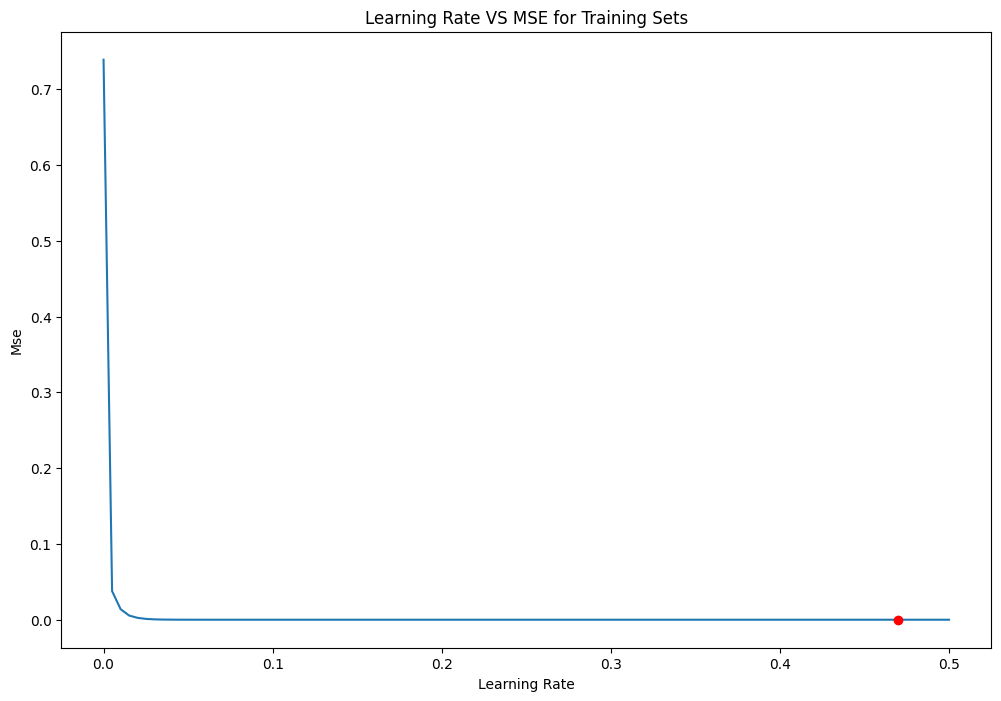

In [136]:
plt.figure(figsize = (12, 8))
plt.plot(learning_rate, mse)
plt.xlabel('Learning Rate')
plt.ylabel('Mse')
plt.plot(learning_rate[np.argmin(mse)], np.min(mse), marker = 'o', color = 'red')
plt.title('Learning Rate VS MSE for Training Sets')
plt.show();

### (d) Produce a plot with diferent shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

In [129]:
learning_rate = np.linspace(.00001, 0.5, 100)
mse_ = np.array([])
for lrate in learning_rate:
  boost = GBR(n_estimators = 1000, random_state = 0, learning_rate = lrate).fit(X_train, y_train)
  mse_ = np.append(mse_, np.mean((y_test -boost.predict(X_test))** 2))
mse_

array([0.89326091, 0.13787508, 0.14189553, 0.14488288, 0.14922746,
       0.14689231, 0.14733549, 0.16272153, 0.14422473, 0.14021045,
       0.14901834, 0.14755112, 0.14113839, 0.1439076 , 0.13527036,
       0.14042095, 0.13729048, 0.13634649, 0.1400554 , 0.13525742,
       0.13507797, 0.13861224, 0.14468487, 0.14137756, 0.15081069,
       0.13011937, 0.14008632, 0.1571786 , 0.13977882, 0.12848984,
       0.14721132, 0.14616132, 0.14722572, 0.12417895, 0.13175907,
       0.13670076, 0.13371289, 0.11656756, 0.14806627, 0.14794943,
       0.14388289, 0.14635247, 0.1347018 , 0.14390996, 0.13917956,
       0.14024891, 0.13958936, 0.13888405, 0.12693019, 0.13076564,
       0.1406914 , 0.14341378, 0.14201265, 0.14353281, 0.14574931,
       0.12289101, 0.12503479, 0.15217411, 0.14171526, 0.13266586,
       0.12276067, 0.13415484, 0.13790805, 0.14474233, 0.14288882,
       0.11712423, 0.10561563, 0.1466145 , 0.13858634, 0.13067976,
       0.138953  , 0.13562755, 0.13212148, 0.12969424, 0.14856

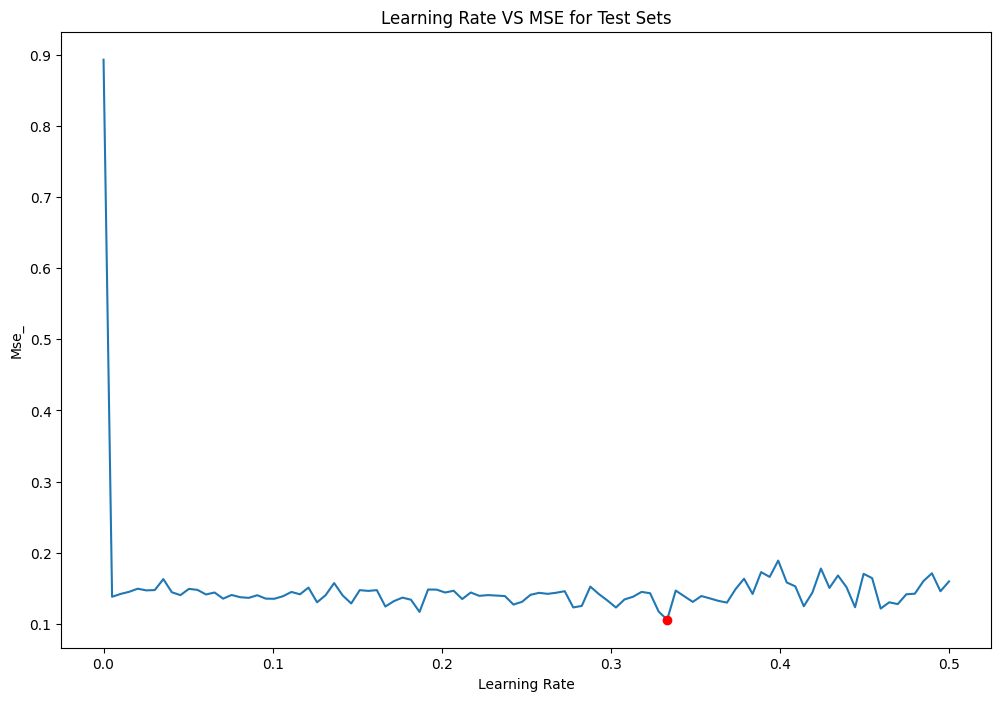

In [137]:
plt.figure(figsize = (12, 8))
plt.plot(learning_rate, mse_)
plt.xlabel('Learning Rate')
plt.ylabel('Mse_')
plt.plot(learning_rate[np.argmin(mse_)], np.min(mse_), marker = 'o', color = 'red')
plt.title('Learning Rate VS MSE for Test Sets')
plt.show();

In [134]:
min_learning_rate = learning_rate[np.argmin(mse_)]
min_mse = np.min(mse_)
min_learning_rate, min_mse

(0.33333666666666667, 0.10561562664118984)

### (e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [140]:
#Chapter 3 we used normal linear regression so that is what I will use here
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
mse_lr = np.mean((y_test - lr.predict(X_test))**2)
mse_lr

0.4554944998613736

In [141]:
# Pretty high MSE almost 4.5 times what our error for gradient boosting was
# Now we will try the Lasso for Chapter 6 as it can cause shrinkage to go to 0 and works well with a lot of predictors.

In [142]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
mse_lasso = np.mean((y_test - lasso.predict(X_test))**2)
mse_lasso


0.4930328073467884

In [147]:
# Wow it is really high too. Almost 5x what our GBR was. However we didn't use cv or find an optimal value for lambda. This would improve it but not much by 5x
# Lets also try PLS while we are going through chapter 6, which is close to PCR so both would predict around the same thing
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression().fit(X_train, y_train)
mse_pls = np.mean((y_test -pls.predict(X_test)[:,0])** 2)
mse_pls

0.4027084928037786

In [148]:
# Wow once again relatively high. This data must have a great fit for regression trees

### (f) Which variables appear to be the most important predictors in the boosted model?

In [150]:
imp_list = pd.Series(boost.feature_importances_, index = features_list).sort_values(ascending = False)
imp_list

CAtBat       0.550471
Hits         0.094525
CRBI         0.086605
Walks        0.045595
CHits        0.042715
AtBat        0.031137
CHmRun       0.029693
Years        0.025101
HmRun        0.018607
PutOuts      0.016183
RBI          0.015749
Runs         0.012825
CRuns        0.011872
Errors       0.009682
Assists      0.005760
CWalks       0.001979
NewLeague    0.001111
League       0.000273
Division     0.000115
dtype: float64

In [151]:
# The most important feature is CAtBat by far!


### (g) Now apply bagging to the training set. What is the test set MSE for this approach?

In [152]:
bagg = RF(n_estimators = 1000, random_state = 0, max_features = len(features_list)).fit(X_train, y_train)
mse_bagg = np.mean((y_test - bagg.predict(X_test))**2)
mse_bagg

0.14045284657381626

In [155]:
bagg_feature = pd.Series(bagg.feature_importances_, index = features_list).sort_values(ascending = False)
bagg_feature

CAtBat       0.406017
CRuns        0.124082
CHits        0.120213
CRBI         0.074245
Hits         0.053995
AtBat        0.040731
CWalks       0.031775
Walks        0.029688
RBI          0.021872
PutOuts      0.018947
Runs         0.017711
Assists      0.012998
CHmRun       0.010789
Errors       0.010691
HmRun        0.010613
Years        0.010527
NewLeague    0.002168
League       0.001591
Division     0.001347
dtype: float64

In [153]:
# Bagging has the same main feature of importance
# Bagging did rather well to the chpater 3 and 6 models. It only got out performed by boosting by .04 points. Which is to be expected. Lets see how Bart would do here
bart  = BART(random_state = 0, burnin = 50, ndraw = 200).fit(X_train, y_train)
bart_mse = np.mean((y_test - bart.predict(X_test))**2)
bart_mse

0.18024341455228107

In [157]:
# Not a bad result by bart. If I played around with the parameters using cv it would be prob be around the boosting and bagging solutions. Lets try random forest really fast with sqrt(p)
rf = RF(n_estimators = 1000, random_state = 0, max_features = int(np.sqrt(len(features_list)))).fit(X_train, y_train)
rf_mse = np.mean((y_test - rf.predict(X_test))**2)
rf_mse

0.13583354216120233

In [158]:
# As expected better than bagging but not quite as good as boosting

## Question 11. This question uses the Caravan data set.

### (a) Create a training set consisting of the frst 1,000 observations, and a test set consisting of the remaining observations.

In [171]:
Caravan = load_data('Caravan')

In [172]:
Caravan.shape

(5822, 86)

In [173]:
1 - 1000/5822

0.8282377189969083

In [174]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [175]:
Caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOSTYPE   5822 non-null   int64   
 1   MAANTHUI  5822 non-null   int64   
 2   MGEMOMV   5822 non-null   int64   
 3   MGEMLEEF  5822 non-null   int64   
 4   MOSHOOFD  5822 non-null   int64   
 5   MGODRK    5822 non-null   int64   
 6   MGODPR    5822 non-null   int64   
 7   MGODOV    5822 non-null   int64   
 8   MGODGE    5822 non-null   int64   
 9   MRELGE    5822 non-null   int64   
 10  MRELSA    5822 non-null   int64   
 11  MRELOV    5822 non-null   int64   
 12  MFALLEEN  5822 non-null   int64   
 13  MFGEKIND  5822 non-null   int64   
 14  MFWEKIND  5822 non-null   int64   
 15  MOPLHOOG  5822 non-null   int64   
 16  MOPLMIDD  5822 non-null   int64   
 17  MOPLLAAG  5822 non-null   int64   
 18  MBERHOOG  5822 non-null   int64   
 19  MBERZELF  5822 non-null   int64   
 20  MBERBOER

In [176]:
Caravan.Purchase

0        No
1        No
2        No
3        No
4        No
       ... 
5817     No
5818     No
5819    Yes
5820     No
5821     No
Name: Purchase, Length: 5822, dtype: category
Categories (2, object): ['No', 'Yes']

In [177]:
Caravan.dropna(inplace = True)
Caravan['Purchase'] = Caravan['Purchase'].map({'Yes': 1, 'No' : 0})
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [178]:
response = 'Purchase'
features = Caravan.columns.drop('Purchase')
features_list = list(features)
X_train , X_test, y_train, y_test = skm.train_test_split(Caravan[features], Caravan[response], test_size = 0.8282377189969083, random_state = 0)

### (b) Fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [180]:
boost = GBR(n_estimators = 1000, random_state = 0, learning_rate = 0.01).fit(X_train , y_train)
imp_list = pd.Series(boost.feature_importances_, index = features_list).sort_values(ascending = False)
imp_list

PPERSAUT    0.148253
ALEVEN      0.091237
PBRAND      0.049131
MGEMOMV     0.038828
MKOOPKLA    0.034947
              ...   
PWAOREG     0.000000
AAANHANG    0.000000
AVRAAUT     0.000000
PZEILPL     0.000000
PVRAAUT     0.000000
Length: 85, dtype: float64

In [181]:
# The PPERSAUT variable is the most important by .05!

### (c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [194]:
pred = boost.predict(X_test)
pred = np.where(pred > .2, 1, 0)
confusion = confusion_table(y_test, pred)
print('Classification Error', 1 - accuracy_score(y_test, pred))
confusion

Classification Error 0.11074243052675237


Truth,0,1
Predicted,,
0,4226,306
1,228,62


In [198]:
# Lets try LogisticRegression First
from  sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train, y_train)
pred_log = log.predict(X_test)
pred_log = np.where(pred_log > 0.2, 1, 0)
print('Classification Error with Logistic Regression: ', 1 - accuracy_score(y_test, pred_log))
confusion_log = confusion_table(y_test, pred_log)
confusion_log

Classification Error with Logistic Regression:  0.06698465367067608


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Truth,0,1
Predicted,,
0,4485,47
1,276,14


In [210]:
# LogisticRegression Actually performed better. Maybe there is a better boosting class out there.
# Lets try KNN second
from sklearn.neighbors import KNeighborsClassifier
knn_pred = KNeighborsClassifier().fit(X_train, y_train).predict(X_test)
knn_pred = np.where(knn_pred > 0.2, 1, 0)
y_test_numeric = y_test.cat.codes
print('Classification Error with KNN: ', 1 - accuracy_score(y_test_numeric,knn_pred))
confusion_knn = confusion_table(y_test, knn_pred)
confusion_knn

Classification Error with KNN:  0.06304437992534218


Truth,0,1
Predicted,,
0,4507,25
1,279,11


In [213]:
#KNN has the smallest error and is also smaller than the boosting.
# I believe there might be more efficent boosting algo out there
# LEts try one really fast
from xgboost import XGBRegressor,XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000, gamma = 0.01).fit(X_train, y_train)
pred = xgboost.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [220]:
pred = np.where(pred > .2, 1, 0)
print('XGBOOST Error: ', 1 - accuracy_score(y_test, pred))
confusion_xgboost = confusion_table(y_test, pred)
confusion_xgboost

XGBOOST Error:  0.07527996681874738


Truth,0,1
Predicted,,
0,4438,94
1,269,21


In [221]:
# Ahh this serror is much better and compares well with the other classification methods. IT is slightly worse
# BUT barley worse

## Question 12. Apply boosting, bagging, random forests, and BART to a data set of your choice. Be sure to ft the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [222]:
Hitters = load_data('Hitters')

In [223]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [224]:
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [225]:
Hitters.dropna(inplace = True)
Hitters['League'] = Hitters['League'].map({'A': 1, 'N': 0})
Hitters['Division'] = Hitters['Division'].map({'E': 1, 'W' : 0})
Hitters['NewLeague'] = Hitters['NewLeague'].map({'A': 1, 'N': 0})
Hitters['Salary'] = np.log(Hitters['Salary'])
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,6.163315,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,6.173786,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,6.214608,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,4.516339,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,6.620073,1


In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Hitters_ = scaler.fit_transform(Hitters)
Hitters_ = pd.DataFrame(Hitters_, columns = Hitters.columns)
Hitters_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,-1.058758,-0.981166,1.221499,-0.523191,0.213352,0.266020,-1.075052
1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,0.944503,-0.981166,2.109109,-0.253863,0.819964,0.277819,0.930187
2,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-1.058758,1.019196,-0.324661,-0.744179,-0.848219,0.323816,-1.075052
3,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,-1.058758,1.019196,1.840678,-0.543909,-0.696566,-1.589726,-1.075052
4,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,0.944503,-0.981166,-0.031177,2.087225,2.488147,0.780678,0.930187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.634968,0.425651,-0.528551,0.402286,-0.134968,-0.189792,-0.483183,0.019917,0.129549,-0.453913,0.053785,-0.060165,-0.463914,-1.058758,1.019196,0.122723,-0.757991,-0.848219,0.702939,-1.075052
259,0.600961,0.625476,-0.757373,0.833807,-0.057549,2.439756,0.979876,1.250292,1.219250,-0.368590,1.620783,0.373605,2.332483,0.944503,1.019196,0.079774,1.810990,1.729882,0.954369,0.930187
260,0.485336,0.403449,-0.986194,0.245369,-0.328515,0.502194,-0.274175,-0.419565,-0.446988,-0.758638,-0.436281,-0.735605,-0.433560,0.944503,-0.981166,-0.908051,-0.039781,-0.241607,0.029320,0.930187
261,1.151881,0.803098,-0.299730,1.186870,0.329546,1.701637,0.143842,0.236810,0.208378,0.338372,0.329068,0.277556,0.272180,0.944503,1.019196,3.662427,0.084525,0.516658,1.058830,0.930187


In [229]:
features = Hitters_.columns.drop('Salary')
features_list = list(features)
response = 'Salary'
X_train , X_test, y_train, y_test = skm.train_test_split(Hitters_[features], Hitters[response], test_size = 0.25, random_state = 0)

In [231]:
errors = {}

### Bagging

In [243]:
learning_rate = np.linspace(.00001, 0.5, 100)
min_mse = float('inf')
for lrate in learning_rate:
  bag = RF(n_estimators = 1000, max_features = len(features_list), ccp_alpha = lrate).fit(X_train, y_train)
  min_mse = min(min_mse, np.mean((y_test - bag.predict(X_test))** 2))
errors['Bagging'] = min_mse
min_mse

0.1453523714807534

### Random Forest

In [244]:
min_mse = float('inf')
for lrate in learning_rate:
  rf = RF(n_estimators = 1000, max_features = int(np.sqrt(len(features_list))), ccp_alpha = lrate).fit(X_train, y_train)
  min_mse =min(min_mse ,np.mean((y_test - rf.predict(X_test))** 2))
errors['Random Forest'] = min_mse
min_mse

0.1457130082389855

### Boosting

In [241]:
learning_rate = np.linspace(.00001, 0.5, 100)
min_mse = float('inf')
for lrate in learning_rate:
  boost = XGBRegressor(n_estimators = 1000, gamma = lrate).fit(X_train ,y_train)
  min_mse = min(min_mse, np.mean((y_test - boost.predict(X_test))**2))
errors['Boosting'] = min_mse
min_mse

0.15074733186909672

In [242]:
min_mse = float('inf')
for lrate in learning_rate:
  boost2 = GBR(n_estimators =1000, learning_rate = lrate).fit(X_train, y_train)
  min_mse = min(min_mse, np.mean((y_test - boost2.predict(X_test))**2))
errors['Boosting2'] = min_mse
min_mse


0.10674510441517007

### BART


In [247]:
bart = BART().fit(X_train, y_train)
mse_bart = np.mean((y_test - bart.predict(X_test))**2)
errors['BART'] = mse_bart
mse_bart

0.17648115989801258

In [279]:
bart2 = BART(random_state = 0, num_trees = 500, burnin = 100, ndraw = 50).fit(X_train, y_train).predict(X_test)
mse_bart2 = np.mean((y_test - bart2)**2)
mse_bart2

0.18622786017611376

In [280]:
# I won't add this one since it got worse with custom constraints

### Linear Regression

In [248]:
lr = LinearRegression().fit(X_train, y_train)
mse_lr = np.mean((y_test - lr.predict(X_test))**2)
errors['Linear Regression'] = mse_lr
mse_lr

0.4400595709363269

### The Lasso

In [249]:
lasso = Lasso().fit(X_train, y_train)
mse_lasso = np.mean((y_test - lasso.predict(X_test))** 2)
errors['Lasso'] = mse_lasso
mse_lasso

0.9155996192648177

### Ridge Regression

In [250]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train).predict(X_test)
mse_ridge = np.mean((y_test - ridge)**2)
errors['Ridge'] = mse_ridge
mse_ridge

0.4150534856003406

### Review Methods!

In [270]:

errors
temp = pd.Series(errors.iloc[0,:])

In [271]:
errors

,Bagging,Random Forest,Boosting,Boosting2,BART,Linear Regression,Lasso,Ridge
Bagging,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
Random Forest,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
Boosting,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
Boosting2,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
BART,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
Linear Regression,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
Lasso,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053
Ridge,0.145352,0.145713,0.150747,0.106745,0.176481,0.44006,0.9156,0.415053


In [275]:
temp = temp.sort_values(ascending = True)
temp

Boosting2            0.106745
Bagging              0.145352
Random Forest        0.145713
Boosting             0.150747
BART                 0.176481
Ridge                0.415053
Linear Regression    0.440060
Lasso                0.915600
Name: Bagging, dtype: float64

In [276]:
# As predicted our new methods worked the best. They outperformed the Chapter 6 methods by a ton
# The new methods also out performed the chapter 3 stnadard method by a lot.
# Out of all the new methods, boosting performed the best which is to be expected.
# Then came all the alternative methods with bootsrapping except for BART since I didn't modify its variables